In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df = pd.read_csv('./dl.csv')

In [3]:
# train = pd.read_csv("./dl.csv")
from sklearn.utils import resample
df_majority = df[df.label==0]
df_minority = df[df.label==1]

df_minority_upsampled = resample(df_minority,
                                 replace=True,     # sample with replacement
                                 n_samples=39325,    # to match majority class
                                 random_state=123)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
train_x = df_upsampled.drop('label', axis = 1)     # 删除表中的某一行或者某一列
train_y = df_upsampled['label']

In [4]:
# Input Variables
X = train_x
Y = train_y

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)
scaler = StandardScaler()   # 去均值和方差归一化。且是针对每一个特征维度来做的，而不是针对样本
X_train = scaler.fit_transform(X_train)   # 计算训练集的平均值和标准差，以便测试数据集使用相同的变换
X_test = scaler.transform(X_test)

y_train = Y_train.to_numpy()
y_test = Y_test.to_numpy()



In [6]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [7]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])     # Adding a third dimension to our data
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM, GRU
model = Sequential()
model.add(GRU(units=512,input_shape=(1, 38), return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=512,input_shape=(1, 38), return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=256,input_shape=(1, 38), return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=256,input_shape=(1, 38), return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=128,input_shape=(1, 38), return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=128,input_shape=(1, 38), return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=64,input_shape=(1, 38), return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=64,input_shape=(1, 38), return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=32,input_shape=(1, 38), return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=32,input_shape=(1, 38), return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=16, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=4, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation="sigmoid"))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 1, 512)            846336    
_________________________________________________________________
dropout (Dropout)            (None, 1, 512)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 1, 512)            1574400   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 512)            0         
_________________________________________________________________
gru_2 (GRU)                  (None, 1, 256)            590592    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 256)            0         
_________________________________________________________________
gru_3 (GRU)                  (None, 1, 256)            3

In [10]:
# from keras.callbacks import EarlyStopping
# EarlyStopping(monitor='loss', patience=30)
trained_model = model.fit(X_train, Y_train, epochs=5000, batch_size=65536)

Epoch 1/5000
1/1 [==============================] - 17s 17s/step - loss: 0.6931 - accuracy: 0.4996
Epoch 2/5000
1/1 [==============================] - 0s 311ms/step - loss: 0.6931 - accuracy: 0.4995
Epoch 3/5000
1/1 [==============================] - 0s 311ms/step - loss: 0.6931 - accuracy: 0.5007
Epoch 4/5000
1/1 [==============================] - 0s 313ms/step - loss: 0.6931 - accuracy: 0.5004
Epoch 5/5000
1/1 [==============================] - 0s 314ms/step - loss: 0.6932 - accuracy: 0.4990
Epoch 6/5000
1/1 [==============================] - 0s 313ms/step - loss: 0.6932 - accuracy: 0.4994
Epoch 7/5000
1/1 [==============================] - 0s 309ms/step - loss: 0.6931 - accuracy: 0.5002
Epoch 8/5000
1/1 [==============================] - 0s 310ms/step - loss: 0.6931 - accuracy: 0.5034
Epoch 9/5000
1/1 [==============================] - 0s 312ms/step - loss: 0.6931 - accuracy: 0.5048
Epoch 10/5000
1/1 [==============================] - 0s 311ms/step - loss: 0.6931 - accuracy: 0.4992


In [11]:
Y_pred = model.predict(X_test)

In [12]:
Y_pred = np.where(Y_pred >= 0.5,1,0)

In [13]:
from sklearn.metrics import classification_report,recall_score,f1_score,precision_score,accuracy_score, roc_auc_score
print(classification_report(Y_test,Y_pred))
actual_acc = accuracy_score(Y_test,Y_pred)
actual_rec = recall_score(Y_test,Y_pred)
actual_p = precision_score(Y_test,Y_pred)
actual_f1 = f1_score(Y_test,Y_pred)
print('AUC ->', roc_auc_score(Y_test, Y_pred))
print('Recall ->',actual_rec)
print('Precision ->',actual_rec)
print('F1 Score ->',actual_f1)
print('Accuracy ->',actual_acc)

              precision    recall  f1-score   support

           0       0.98      0.89      0.93      7859
           1       0.90      0.98      0.94      7871

    accuracy                           0.94     15730
   macro avg       0.94      0.94      0.94     15730
weighted avg       0.94      0.94      0.94     15730

AUC -> 0.9353741183725893
Recall -> 0.9824672849701436
Precision -> 0.9824672849701436
F1 Score -> 0.9383569955102536
Accuracy -> 0.9354100445009536


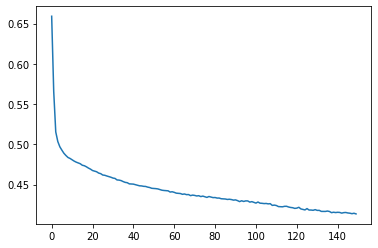

In [165]:
plt.plot(trained_model.history["loss"])

4. SMOTE (synthetic minority oversampling technique)

In [168]:
# Import the SMOTE package
from imblearn.over_sampling import SMOTE

In [169]:
# Synthesize minority class datapoints using SMOTE
sm = SMOTE(random_state=42)
smote_x_train, smote_y_train = sm.fit_resample(X_train, Y_train)

In [170]:
# Separate into training and test sets
smote_x_train = pd.DataFrame(smote_x_train, columns = X_train.columns)
smote_y_train = pd.DataFrame(smote_y_train, columns = ['Churn'])

In [171]:
model = Sequential()
model.add(Dense(8, activation="relu", input_dim=20))
model.add(Dense(8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [172]:
model.compile(optimizer="adam", loss="binary_crossentropy")

In [173]:
trained_model = model.fit(smote_x_train, smote_y_train, epochs=150,batch_size=20)

Epoch 1/150
359/359 [==============================] - 1s 1ms/step - loss: 0.6166
Epoch 2/150
359/359 [==============================] - 0s 1ms/step - loss: 0.4921
Epoch 3/150
359/359 [==============================] - 0s 1ms/step - loss: 0.4782
Epoch 4/150
359/359 [==============================] - 0s 1ms/step - loss: 0.4712
Epoch 5/150
359/359 [==============================] - 0s 1ms/step - loss: 0.4666
Epoch 6/150
359/359 [==============================] - 0s 1ms/step - loss: 0.4626
Epoch 7/150
359/359 [==============================] - 0s 1ms/step - loss: 0.4603
Epoch 8/150
359/359 [==============================] - 0s 1ms/step - loss: 0.4574
Epoch 9/150
359/359 [==============================] - 0s 1ms/step - loss: 0.4565
Epoch 10/150
359/359 [==============================] - 0s 1ms/step - loss: 0.4556
Epoch 11/150
359/359 [==============================] - 0s 1ms/step - loss: 0.4540
Epoch 12/150
359/359 [==============================] - 0s 1ms/step - loss: 0.4530
Epoch 13/150


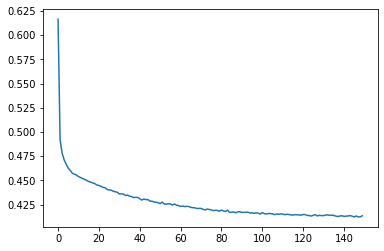

In [174]:
plt.plot(trained_model.history["loss"])

In [175]:
Y_pred = model.predict(X_test)
Y_pred = np.where(Y_pred >= 0.5,1,0)

In [176]:
print(classification_report(Y_test,Y_pred))
smote_acc = accuracy_score(Y_test,Y_pred)
smote_rec = recall_score(Y_test,Y_pred)
smote_p = precision_score(Y_test,Y_pred)
smote_f1 = f1_score(Y_test,Y_pred)
print('Recall ->',smote_rec)
print('Precision ->',smote_rec)
print('F1 Score ->',smote_f1)
print('Accuracy ->',smote_acc)

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1585
           1       0.47      0.77      0.59       528

    accuracy                           0.73      2113
   macro avg       0.69      0.74      0.69      2113
weighted avg       0.80      0.73      0.75      2113

Recall -> 0.7746212121212122
Precision -> 0.7746212121212122
F1 Score -> 0.5880661394680086
Accuracy -> 0.7288215806909607


In [177]:
smote_y_train.value_counts()

Churn
1        3589
0        3589
dtype: int64

5. ADASYN: Adaptive Synthetic Sampling Approach

In [178]:
from imblearn.over_sampling import ADASYN

# Synthesize minority class datapoints using SMOTE
ada = ADASYN(random_state=42)
ada_x_train, ada_y_train = ada.fit_resample(X_train, Y_train)

In [179]:
# Separate into training and test sets
ada_x_train = pd.DataFrame(ada_x_train, columns = X_train.columns)
ada_y_train = pd.DataFrame(ada_y_train, columns = ['Churn'])

In [180]:
ada_y_train.value_counts()

Churn
1        3640
0        3589
dtype: int64

In [181]:
model = Sequential()
model.add(Dense(8, activation="relu", input_dim=20))
model.add(Dense(8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [182]:
model.compile(optimizer="adam", loss="binary_crossentropy")

In [183]:
trained_model = model.fit(ada_x_train, ada_y_train, epochs=150,batch_size=20)

Epoch 1/150
362/362 [==============================] - 1s 1ms/step - loss: 0.6772
Epoch 2/150
362/362 [==============================] - 0s 1ms/step - loss: 0.5734
Epoch 3/150
362/362 [==============================] - 0s 1ms/step - loss: 0.5213
Epoch 4/150
362/362 [==============================] - 0s 1ms/step - loss: 0.5114
Epoch 5/150
362/362 [==============================] - 0s 1ms/step - loss: 0.5069
Epoch 6/150
362/362 [==============================] - 0s 1ms/step - loss: 0.5032
Epoch 7/150
362/362 [==============================] - 0s 1ms/step - loss: 0.5004
Epoch 8/150
362/362 [==============================] - 0s 1ms/step - loss: 0.4981
Epoch 9/150
362/362 [==============================] - 0s 1ms/step - loss: 0.4965
Epoch 10/150
362/362 [==============================] - 0s 1ms/step - loss: 0.4946
Epoch 11/150
362/362 [==============================] - 0s 1ms/step - loss: 0.4928
Epoch 12/150
362/362 [==============================] - 0s 1ms/step - loss: 0.4908
Epoch 13/150


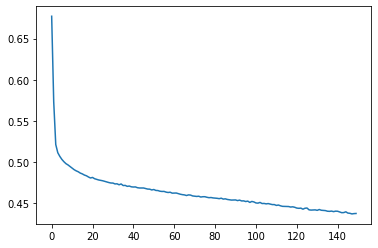

In [184]:
plt.plot(trained_model.history["loss"])

In [185]:
Y_pred = model.predict(X_test)
Y_pred = np.where(Y_pred >= 0.5,1,0)

In [186]:
print(classification_report(Y_test,Y_pred))
ada_acc = accuracy_score(Y_test,Y_pred)
ada_rec = recall_score(Y_test,Y_pred)
ada_p = precision_score(Y_test,Y_pred)
ada_f1 = f1_score(Y_test,Y_pred)
print('Recall ->',ada_rec)
print('Precision ->',ada_rec)
print('F1 Score ->',ada_f1)
print('Accuracy ->',ada_acc)

              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1585
           1       0.47      0.79      0.59       528

    accuracy                           0.72      2113
   macro avg       0.69      0.75      0.69      2113
weighted avg       0.80      0.72      0.74      2113

Recall -> 0.7897727272727273
Precision -> 0.7897727272727273
F1 Score -> 0.5889830508474576
Accuracy -> 0.7245622337908187


6. Hybridization: SMOTE + Tomek Links


In [187]:
from imblearn.combine import SMOTETomek

In [188]:
# oversampling using SMOTE+TOMEK
stom = SMOTETomek(random_state=42)
stom_x_train, stom_y_train = stom.fit_resample(X_train, Y_train)

In [189]:
# Separate into training and test sets
stom_x_train = pd.DataFrame(stom_x_train, columns = X_train.columns)
stom_y_train = pd.DataFrame(stom_y_train, columns = ['Churn'])

In [190]:
stom_y_train.value_counts()

Churn
1        3470
0        3470
dtype: int64

In [191]:
model = Sequential()
model.add(Dense(8, activation="relu", input_dim=20))
model.add(Dense(8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy")

trained_model = model.fit(stom_x_train, stom_y_train, epochs=150,batch_size=20)

Epoch 1/150
347/347 [==============================] - 1s 1ms/step - loss: 0.5956
Epoch 2/150
347/347 [==============================] - 0s 1ms/step - loss: 0.4839
Epoch 3/150
347/347 [==============================] - 0s 1ms/step - loss: 0.4642
Epoch 4/150
347/347 [==============================] - 0s 1ms/step - loss: 0.4551
Epoch 5/150
347/347 [==============================] - 0s 1ms/step - loss: 0.4497
Epoch 6/150
347/347 [==============================] - 0s 1ms/step - loss: 0.4459
Epoch 7/150
347/347 [==============================] - 0s 1ms/step - loss: 0.4427
Epoch 8/150
347/347 [==============================] - 0s 1ms/step - loss: 0.4401
Epoch 9/150
347/347 [==============================] - 0s 1ms/step - loss: 0.4377
Epoch 10/150
347/347 [==============================] - 0s 1ms/step - loss: 0.4365
Epoch 11/150
347/347 [==============================] - 0s 1ms/step - loss: 0.4340
Epoch 12/150
347/347 [==============================] - 0s 1ms/step - loss: 0.4332
Epoch 13/150


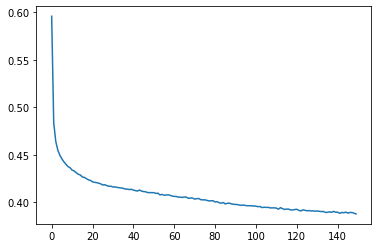

In [192]:
plt.plot(trained_model.history["loss"])

In [193]:
Y_pred = model.predict(X_test)
Y_pred = np.where(Y_pred >= 0.5,1,0)


print(classification_report(Y_test,Y_pred))
smtom_acc = accuracy_score(Y_test,Y_pred)
smtom_rec = recall_score(Y_test,Y_pred)
smtom_p = precision_score(Y_test,Y_pred)
smtom_f1 = f1_score(Y_test,Y_pred)
print('Recall ->',smtom_rec)
print('Precision ->',smtom_rec)
print('F1 Score ->',smtom_f1)
print('Accuracy ->',smtom_acc)

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1585
           1       0.52      0.74      0.61       528

    accuracy                           0.76      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.80      0.76      0.77      2113

Recall -> 0.740530303030303
Precision -> 0.740530303030303
F1 Score -> 0.6076146076146076
Accuracy -> 0.7610033128253668


7. Hybridization: SMOTE + ENN


In [194]:
from imblearn.combine import SMOTEENN

In [195]:
# oversampling using SMOTE+ENN
senn = SMOTEENN(random_state=42)
senn_x_train, senn_y_train = senn.fit_resample(X_train, Y_train)

In [196]:
# Separate into training and test sets
senn_x_train = pd.DataFrame(senn_x_train, columns = X_train.columns)
senn_y_train = pd.DataFrame(senn_y_train, columns = ['Churn'])

In [197]:
senn_y_train.value_counts()

Churn
1        2621
0        1834
dtype: int64

In [198]:
model = Sequential()
model.add(Dense(8, activation="relu", input_dim=20))
model.add(Dense(8, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy")

trained_model = model.fit(senn_x_train, senn_y_train, epochs=150,batch_size=20)

Epoch 1/150
223/223 [==============================] - 1s 1ms/step - loss: 0.4640
Epoch 2/150
223/223 [==============================] - 0s 1ms/step - loss: 0.2671
Epoch 3/150
223/223 [==============================] - 0s 1ms/step - loss: 0.2369
Epoch 4/150
223/223 [==============================] - 0s 1ms/step - loss: 0.2268
Epoch 5/150
223/223 [==============================] - 0s 1ms/step - loss: 0.2201
Epoch 6/150
223/223 [==============================] - 0s 1ms/step - loss: 0.2152
Epoch 7/150
223/223 [==============================] - 0s 1ms/step - loss: 0.2096
Epoch 8/150
223/223 [==============================] - 0s 1ms/step - loss: 0.2054
Epoch 9/150
223/223 [==============================] - 0s 1ms/step - loss: 0.2022
Epoch 10/150
223/223 [==============================] - 0s 1ms/step - loss: 0.1999
Epoch 11/150
223/223 [==============================] - 0s 1ms/step - loss: 0.1965
Epoch 12/150
223/223 [==============================] - 0s 1ms/step - loss: 0.1956
Epoch 13/150


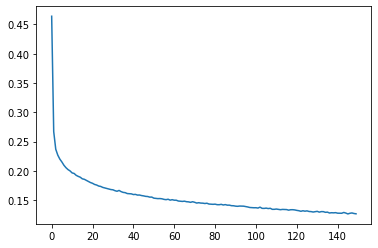

In [199]:
plt.plot(trained_model.history["loss"])

In [200]:
Y_pred = model.predict(X_test)
Y_pred = np.where(Y_pred >= 0.5,1,0)


print(classification_report(Y_test,Y_pred))
smenn_acc = accuracy_score(Y_test,Y_pred)
smenn_rec = recall_score(Y_test,Y_pred)
smenn_p = precision_score(Y_test,Y_pred)
smenn_f1 = f1_score(Y_test,Y_pred)
print('Recall ->',smenn_rec)
print('Precision ->',smenn_rec)
print('F1 Score ->',smenn_f1)
print('Accuracy ->',smenn_acc)

              precision    recall  f1-score   support

           0       0.93      0.66      0.77      1585
           1       0.46      0.85      0.59       528

    accuracy                           0.71      2113
   macro avg       0.69      0.76      0.68      2113
weighted avg       0.81      0.71      0.73      2113

Recall -> 0.8541666666666666
Precision -> 0.8541666666666666
F1 Score -> 0.5938117182356814
Accuracy -> 0.7079981069569332


In [201]:
performance = pd.DataFrame([[actual_acc,under_acc,over_acc,smote_acc,ada_acc,smtom_acc,smenn_acc],
              [actual_rec,under_rec,over_rec,smote_rec,ada_rec,smtom_rec,smenn_rec],
              [actual_p,under_p,over_p,smote_p,ada_p,smtom_p,smenn_p],
              [actual_f1,under_f1,over_f1,smote_f1,ada_f1,smtom_f1,smenn_f1]]).T

performance.columns=['Accuracy','Recall','Precision','F1 Score']
performance.index=['Actual','Under_Sampling','Over_Sampling','SMOTE','ADASYN','SMOTE+TOMEK','SMOTE+ENN']

In [202]:
performance

,Accuracy,Recall,Precision,F1 Score
Actual,0.795551,0.607955,0.587912,0.597765
Under_Sampling,0.721723,0.793561,0.466592,0.587658
Over_Sampling,0.746805,0.768939,0.495726,0.602821
SMOTE,0.728822,0.774621,0.473928,0.588066
ADASYN,0.724562,0.789773,0.469595,0.588983
SMOTE+TOMEK,0.761003,0.740530,0.515152,0.607615
SMOTE+ENN,0.707998,0.854167,0.455096,0.593812


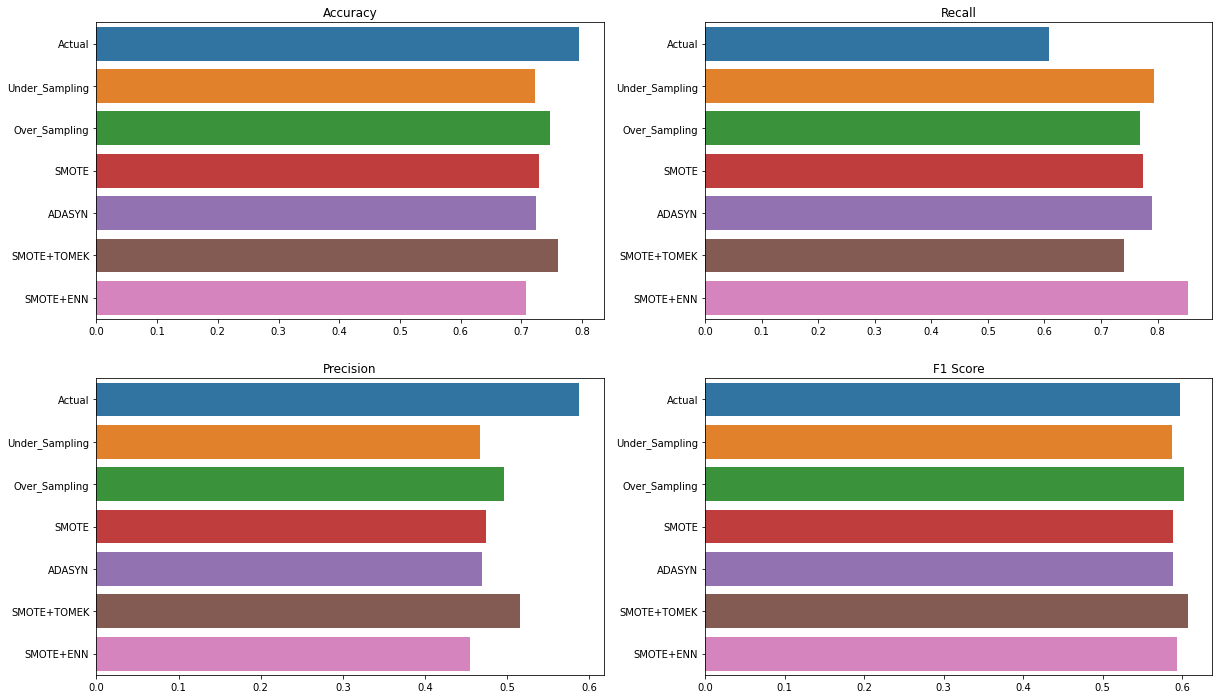

In [203]:
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.barplot(x=performance.Accuracy.values,y=performance.Accuracy.index)
plt.title('Accuracy')

plt.subplot(2,2,2)
sns.barplot(x=performance.Recall.values,y=performance.Recall.index)
plt.title('Recall')

plt.subplot(2,2,3)
sns.barplot(x=performance.Precision.values,y=performance.Precision.index)
plt.title('Precision')

plt.subplot(2,2,4)
sns.barplot(x=performance['F1 Score'].values,y=performance['F1 Score'].index)
plt.title('F1 Score')

plt.show()